# Time Series Forecasting

**Problem Statement**: The Air Passenger Traffic Forecasting Problem​: An airline company has the data on the number of passengers that have travelled with them on a particular route for the past few years. Using this data, they want to see if they can forecast the number of passengers for the next twelve months.

**The basic steps involved in any forecasting problem are**:

1. Define the problem

2. Collect the data

There are three important characteristics that every time series data must exhibit in order for us to make a good forecast.

   A.) **Level** : The time-series data should be relevant for the set objective that we want to achieve.

   B.) **Accurate**: The data should be accurate in terms of capturing the timestamps and capturing the observation correctly.
    
   C.) **Long enough**: The data should be long enough to forecast. This is because it is important to identify all the patterns in the past and forecast which patterns repeat in the future.


3. Analyze the data

    A.) **Level** : This is the baseline of a time series. This gives the baseline to which we add the different other components.
    
    B.) **Trend** : Over a long term, this gives an indication of whether the time series moves lower or higher
    
    C.) **Seasonality** :​ It is a pattern in a time-series data that repeats itself after a given period of time.
    
    D.) **Noise**:​ Noise is the completely random fluctuation present in the time series data and we cannot use this component to forecast into the future. This is that component of the time series data that no one can explain and is completely random. Because of noise present in the data, it becomes difficult to forecast sometimes the accurate values.
    




4.Build and evaluate the forecast model



# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [2]:
data = pd.read_csv('/Users/jasdeepmonga/Downloads/airline-passenger-traffic (1).csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


# Time series analysis

## Plot time series data

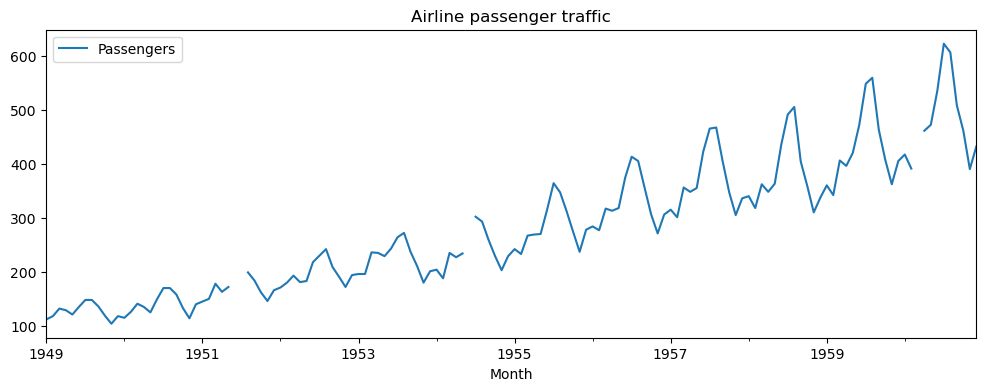

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation


Imputing the missing values with the overall mean of the time series data. In the following graph, the blue curves indicate the values imputed using the mean imputation method done for the time series data represented in orange.

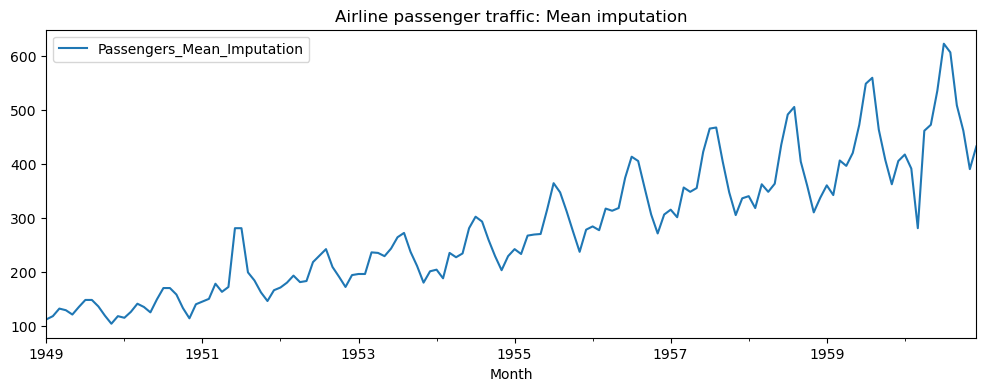

In [4]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

Drawing a straight line joining the next and previous points of the missing values in the data.

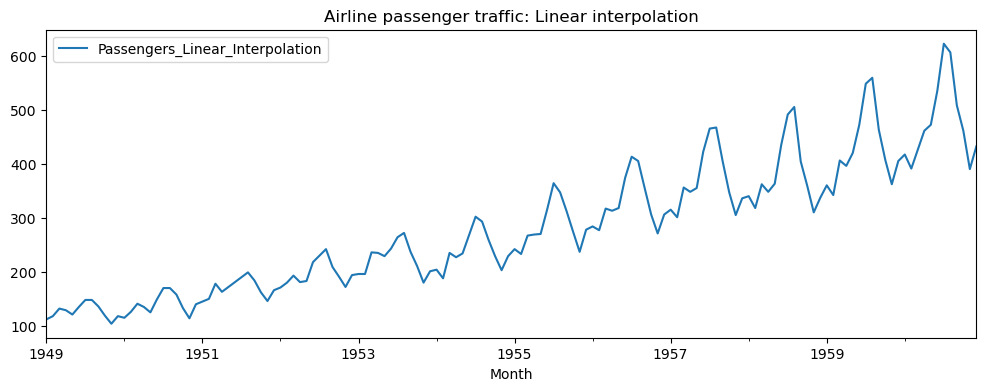

In [5]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [6]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

The points lying on either side of the whiskers are considered to be outliers as shown in the image. The length of these whiskers is subjective and can be defined by you according to the problem.

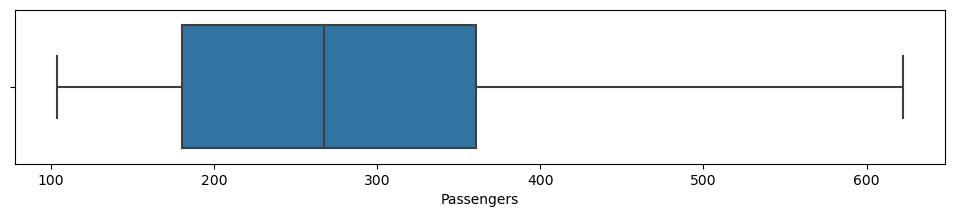

In [7]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

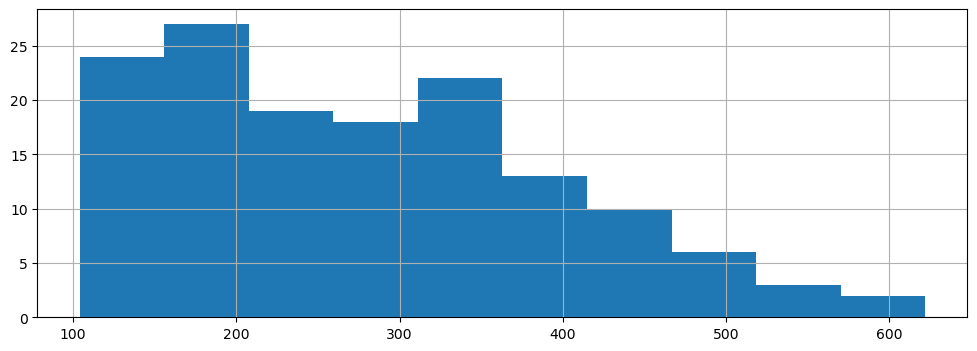

In [8]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

A time-series data mostly has two major components - trend and seasonality. The data can be decomposed to extract these two components individually.

There are two ways in which the time series data can be decomposed that is **additive seasonal decomposition** and **multiplicative seasonal decomposition**.

### Additive seasonal decomposition

**The individual components in any time series data can be added to get the time-series data**. 

This decomposition is used when the magnitude of the seasonal pattern in the data does not directly correlate with the value of the series, the additive seasonal decomposition may be a better choice to split the time series so that the residual does not have any pattern.

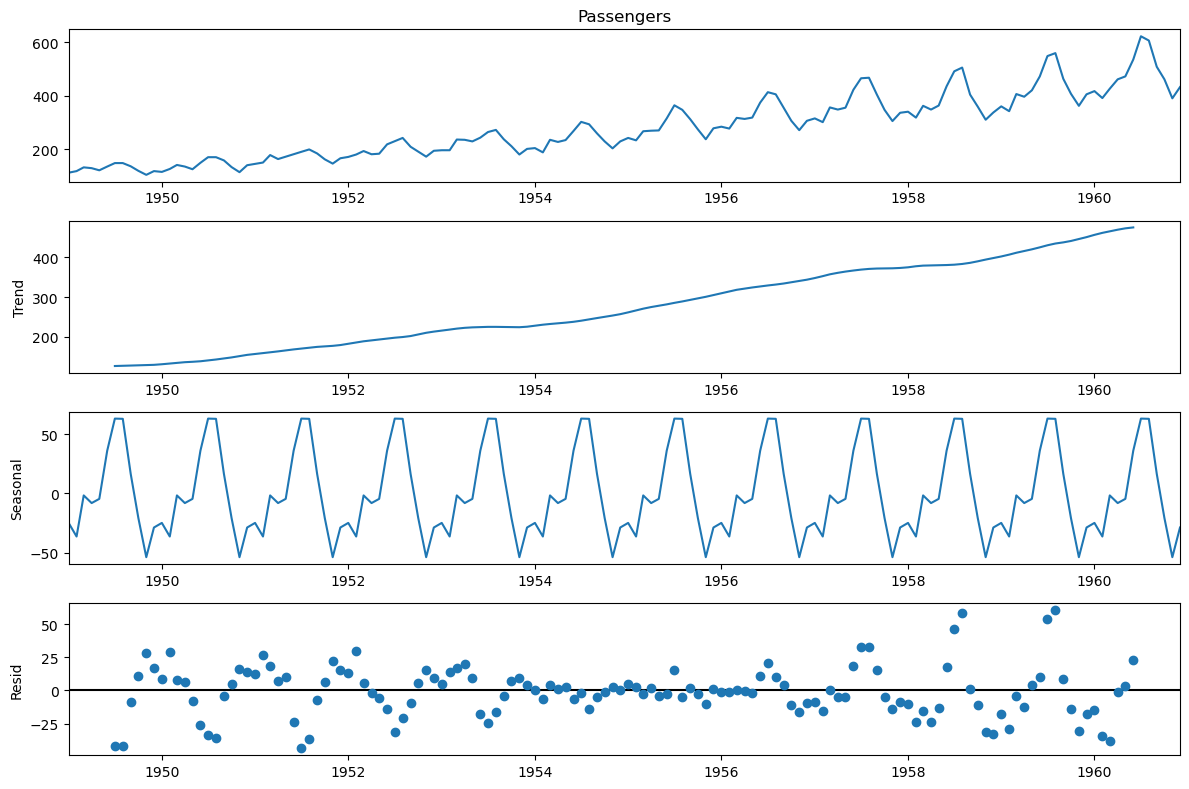

In [9]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

**The individual components in any time series data can be multiplied to get the time-series data**. This decomposition is used when the magnitude of the seasonal pattern in the data increases with an increase in data values and decreases with a decrease in the data values, the multiplicative seasonal decomposition may be a better choice.

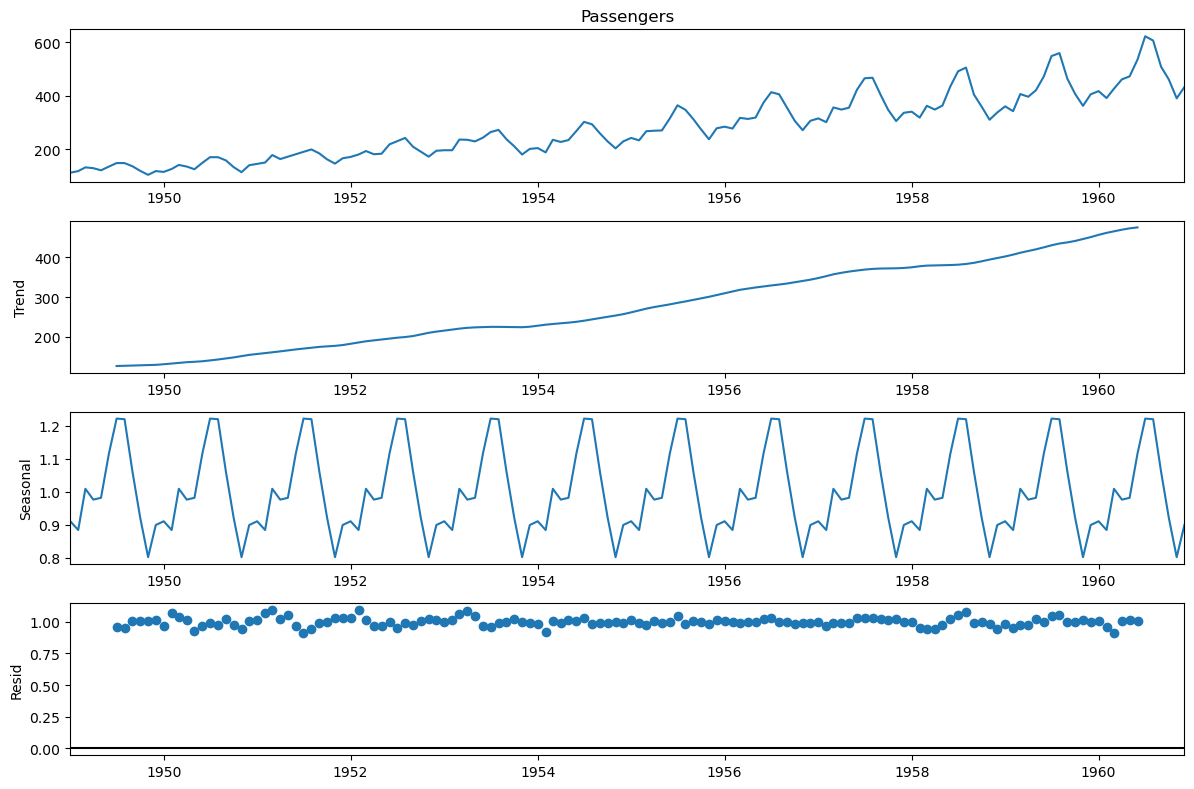

In [10]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [11]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

# Simple time series methods

## Naive method

**Naive method**:  Future value of a series is predicted to be the same as the last observed value.

    ○ Forecast = Last month’s sales

In [12]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

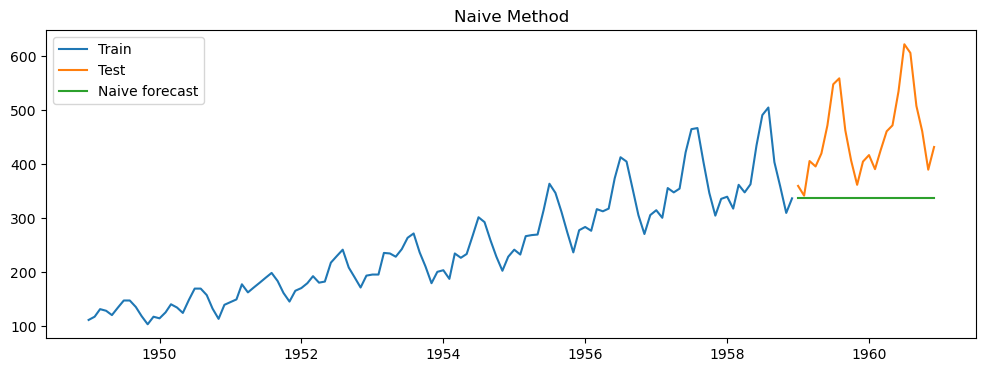

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


## Simple average method

    Forecast = Average of all past months’ sales

In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

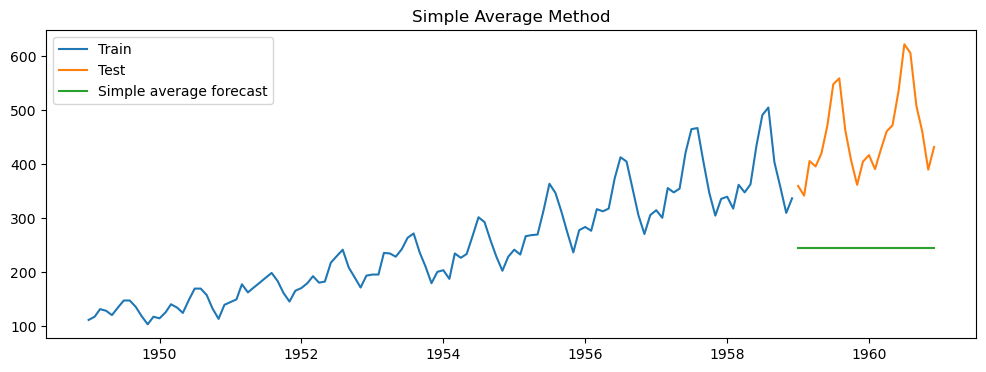

In [16]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

**RMSE**: It measures the average magnitude of the errors between predicted values and actual values.

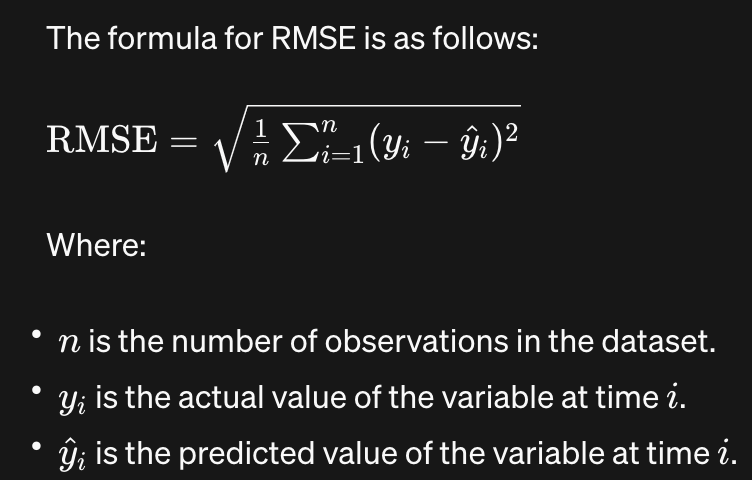

**MAPE**: It measures the average absolute percentage difference between predicted values and actual values.




In [17]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28


## Simple moving average method

It is calculated by taking the average of a specified number of data points over a given period of time, with equal weight assigned to each data point.

Here's how you calculate the **Simple Moving Average**:

1. Choose a window size or period n, which represents the number of data points to include in the calculation.

2. Take the average of the most recent n data points.

3. Shift the window by one data point and repeat the process until you have covered all data points.

Example: **If we are forecasting for the next month we can take into consideration the last 12 months window.**

**For the 13th month we take the average of last 12 months similarly for 14th month we take average for 2nd till 13th month.**

In [18]:
y_hat_sma = data.copy()
# Window size
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

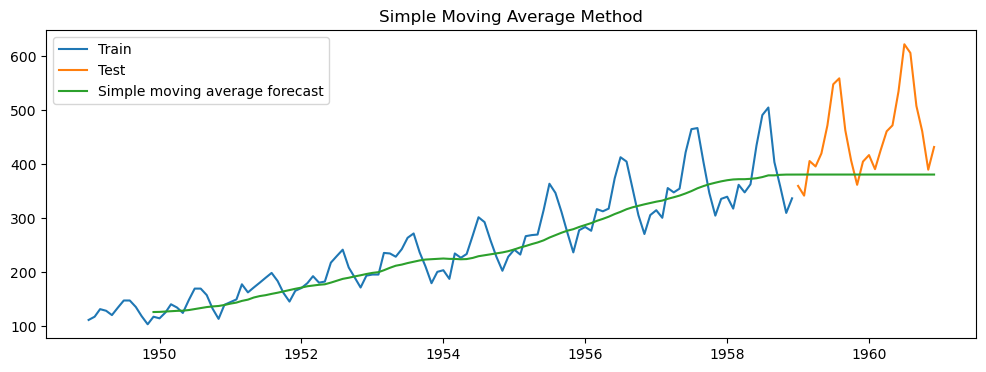

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [20]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54


# Exponential smoothing methods

In the weighted average technique, the underlying idea is that **each observation influencing y​t+1 is assigned a specific weight**.

More recent observations get more weight, whereas the previous observations get less weight. Suppose you consider a time series data of the previous 12 months and are forecasting ​yt​ +1.​ 

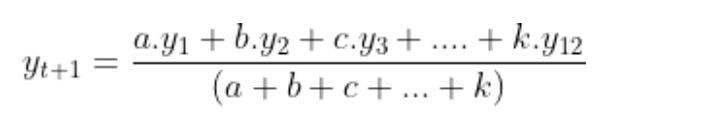

such that **​a < b < c < .....< k​**, where **k is the largest weight assigned to the most recent data point i.e. ​y​12**.​


This helps us forecast the **level in the time series data**. The forecast observation data, ​y​t+1,​ is a function of the level component that is denoted by ​l​t.​

When we don't have l1 for the 1st oberservation we can set it to the value of the actual observation.

The values of ​α ​lie between ​0​ and ​1​.

## Simple exponential smoothing

**This has level component with it i.e., α**

As we increase the value of α it assigns more weight to the most recent observation and the lag reduces but introdues noise. So value of α should be chosen carefully.

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Plot train, test and forecast

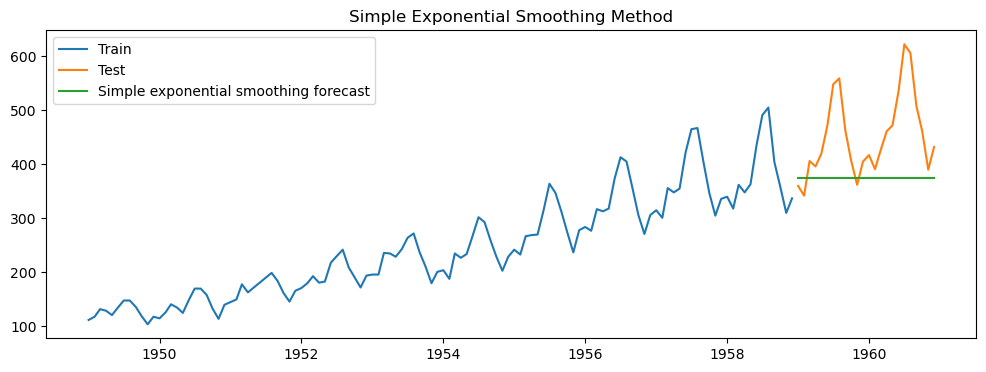

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [23]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49


## Holt's method with trend

Holt's exponential smoothing technique forecasts the **level** and **trend** of the time series data.

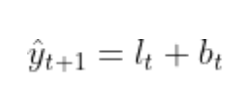

Here **l​t**​ is the **level** component, and **b​t**​ is the **trend** component.

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666658, 'initial_trend': 2.06060606060607, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

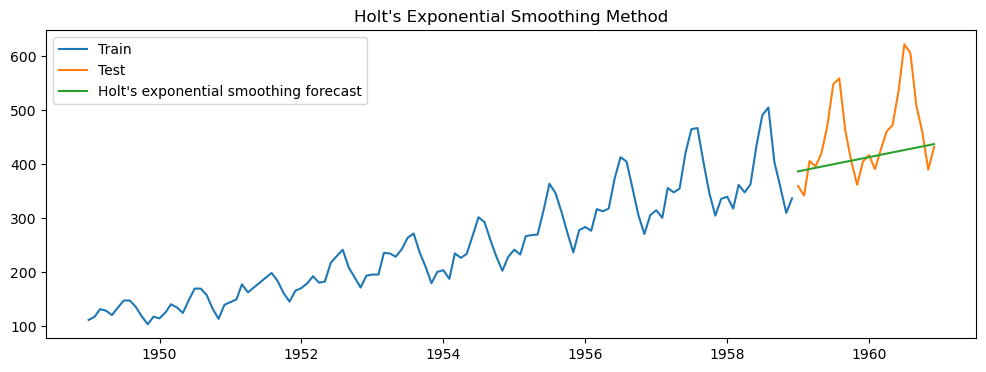

In [25]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [26]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39


## Holt Winters' additive method with trend and seasonality


The Holt-Winters’ smoothing technique forecasts the level, trend as well as the seasonality for a time series data.. The forecast equation now has seasonal components, including level and trend i.e.

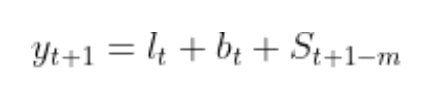

There are two methods of performing the Holt-Winters’ smoothing techniques: additive and multiplicative methods. In a time-series data, if the **seasonality is not a function of the level component or the difference between subsequent troughs of the time series data does not increase as you progress in the graph, then the Holt-Winters’ additive method works best**.

**Example** : In an ice cream sale there is a difference between the summer month sales and the winter month sales that differnence remails more or less constant. Then we use an additive model.


But suppose **seasonality is a function of the level and the difference between the troughs of the time series data increases as you progress in the graph, then you use the multiplicative method**.

**Example**: But when an average demand increases that means there is a difference in the peak and non peak i.e., in case of airline passenger.

m is the number of times a season repeats during a period.

In [27]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361069391780843, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7638930608219157, 'damping_trend': nan, 'initial_level': 119.13321031354344, 'initial_trend': 2.2767040693043827, 'initial_seasons': array([ -9.42084174,  -3.88672194,   8.63310149,   3.54835637,
        -5.15359377,   8.98342319,  21.25019296,  19.33088993,
         5.24596839, -13.59967868, -28.28058699, -12.13065638]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

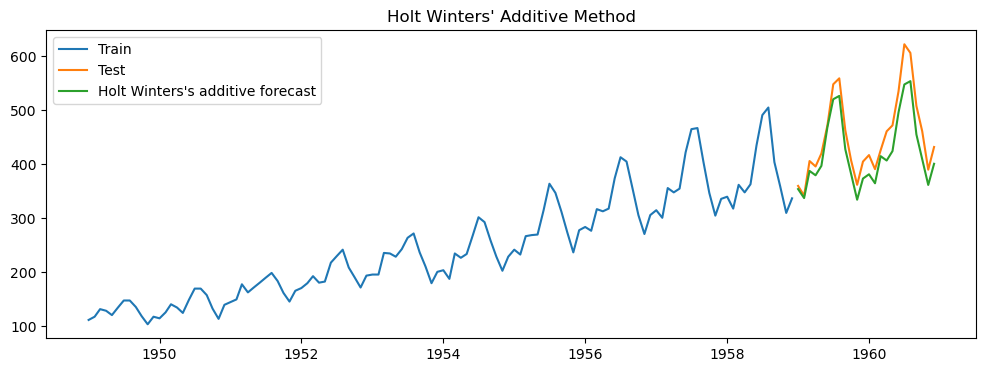

In [28]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [29]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72


## Holt Winter's multiplicative method with trend and seasonality

In [30]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.36559851525111425, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.6344014847488857, 'damping_trend': nan, 'initial_level': 98.36873284412803, 'initial_trend': 2.1304689558674075, 'initial_seasons': array([1.11443663, 1.17223382, 1.28848   , 1.22492307, 1.13060861,
       1.23639041, 1.34450013, 1.33537668, 1.21815314, 1.06153076,
       0.94373196, 1.08878587]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

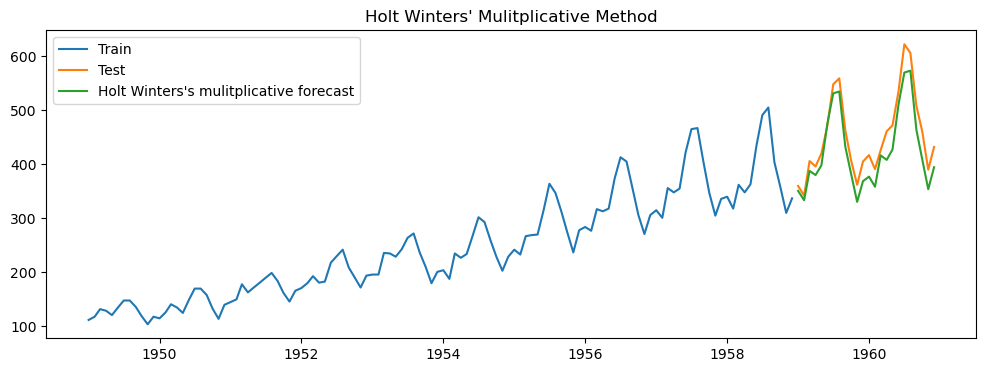

In [31]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [32]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45


## Time Series 2nd part

# Auto Regressive methods

We forecast the future observations using a linear combination of past observations of the same variable i.e. to predict y⌃​t which is the future forecast of a variable, we need one or more past observations of y​t​ that is y​t-1,​ y​t-2,​ 

## Stationarity vs non-stationary time series

If a time series is stationary, its statistical properties like mean, variance, and​ ​covariance will be the same throughout the series, irrespective of the time at which you observe them. 

**White Noise** is an example of a stationary time series with purely random, uncorrelated observations with no identifiable trend, seasonal or cyclical components.

A **random walk** is a time series where the current observation is equal to the previous observation plus a random change. Here, variance increases over time resulting in a non-stationary series.

### Stationarity Tests

There are two tests that confirm whether a series is a stationary time series or not.

1. ADF(Augmneted Dickey Fuller Test)
2. KPSS Test

There is a hypothesis associated with both the tests.

**ADF Test**

    ● Null Hypothesis (H​0​): The series is not stationary p−value>0.05

    ● Alternate Hypothesis (H​1)​ : The series is stationary p−value≤0.05
    
**KPSS Test**

    ● Null Hypothesis (H​0​): The series is stationary  p−value>0.05
    
    ● Alternate Hypothesis (H​1)​ : The series is not stationary p−value≤0.05
    

**Interpretation of p-value**.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis, otherwise, a p-value above the threshold suggests we fail to reject the null hypothesis.

● p−value>0.05: Fail to reject the null hypothesis (H​0​).

● p−value≤0.05: Reject the null hypothesis (H​0​).

### ADF Test

In [33]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.894609
Critical Values @ 0.05: -2.88
p-value: 0.993020


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [34]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.651190
Critical Values @ 0.05: 0.46
p-value: 0.010000


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


On inspecting the ADF test, we know that as per the null hypothesis, the series is not stationary. When p−value>0.05. Thus, we know that the time series in the airline passenger data is not a stationary time series and we need to make it stationary first by making the variance and the mean constant.


This is done by the **Box-Cox transformation** and the **Differencing** over the time series and will be explained in the sections below.

In [35]:
## Box cox Transformation-Makes variance constant

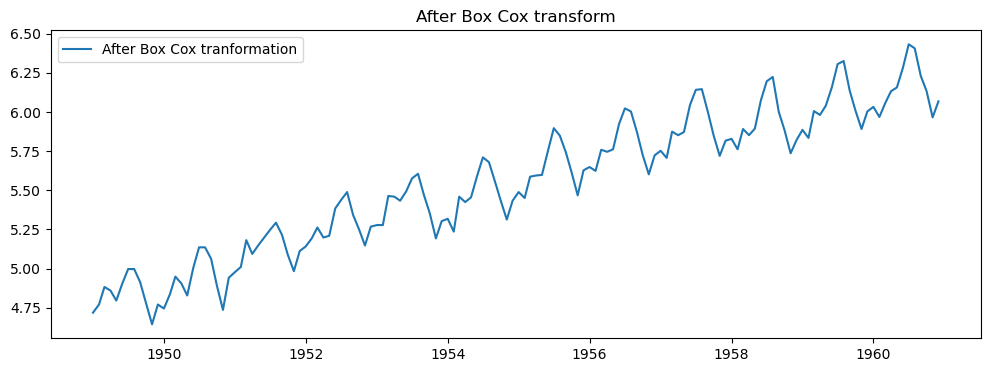

In [36]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [37]:
## Differencing to remove trend-Makes mean constant

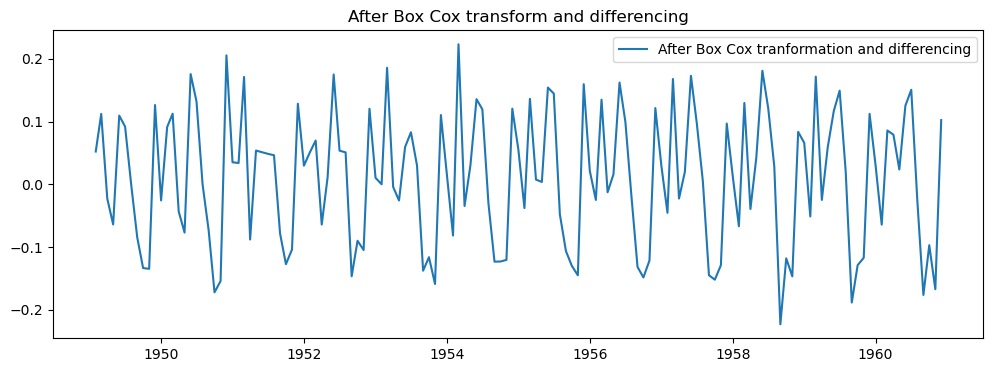

In [38]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [39]:
data_boxcox_diff.dropna(inplace=True)

In [40]:
data_boxcox_diff.tail()

Month
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

In [41]:
## ADF Test

adf_test = adfuller(data_boxcox_diff)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.290114
Critical Values @ 0.05: -2.88
p-value: 0.015326


In [42]:
# KPSS Test
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.038341
Critical Values @ 0.05: 0.46
p-value: 0.100000


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Autocorrelation Function (ACF)

Autocorrelation helps us to know how a variable is influenced by its own lagged values. It captures both direct and indirect relationship between the variables.

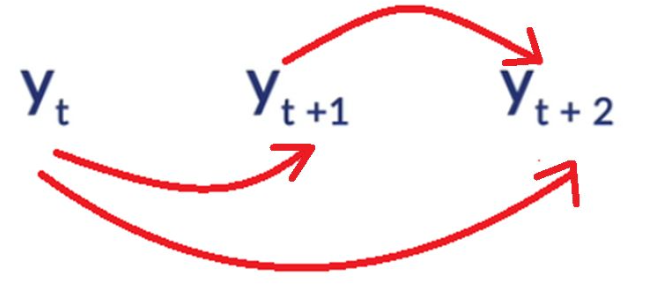

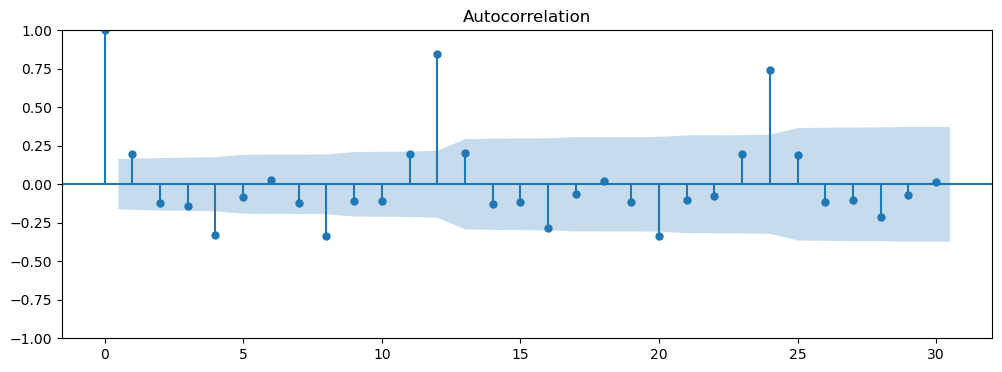

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In the ACF plot above, you can see the plot for 30 lags in the dataset. We decide the window size, that is q using the above plot. As you can see, the highest lag after which the autocorrelation dies down is 1. Thus q =1 will be suitable for the airline passenger problem.

### Partial autocorrelation Function (PACF)

To capture only direct relationships, we have another measure called Partial Autocorrelation Function or PACF.

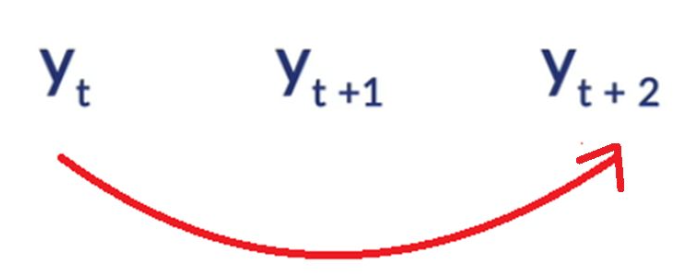

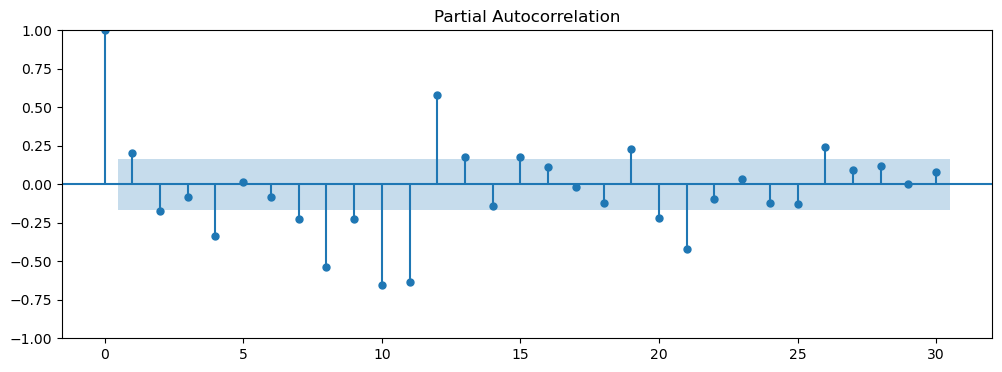

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In the PACF plot above, the highest lag for which the partial autocorrelation is significantly high is the p = 1. 

Thus this value of p will be suitable while using the ARIMA techniques in the airline passenger problem.

In [45]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [46]:
train_data_boxcox_diff

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-08-01    0.028114
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
Length: 119, dtype: float64

## Simple Auto regression method (AR)

The Simple Auto Regressive model predicts the future observation as linear regression of one or more past observations.

The simple autoregressive model forecasts the dependent variable (future observation) when one or more independent variables are known (past observations). **It has a parameter 'p' called lag order.** 

Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points.

**Select p as the highest lag where partial autocorrelation is significantly high**



In [47]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.009473
ar.L1     0.183106
sigma2    0.010680
dtype: float64


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
### Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

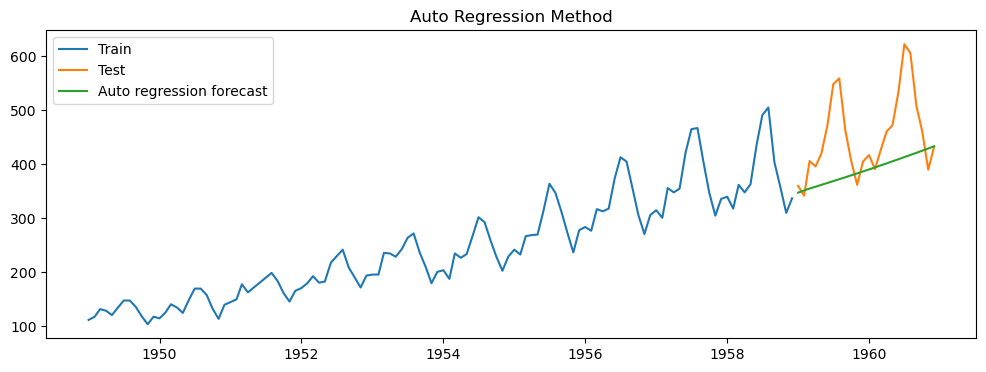

In [49]:
# Plot Train Test and Forecast

plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### RMSE and MAPE

In [50]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78


## Moving Average Model (MA)

The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. This model has a **parameter ‘q’** called window size over which linear combination of errors are calculated.

In [51]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.009533
ma.L1     0.266099
sigma2    0.010515
dtype: float64


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
# Recover Original Time Series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

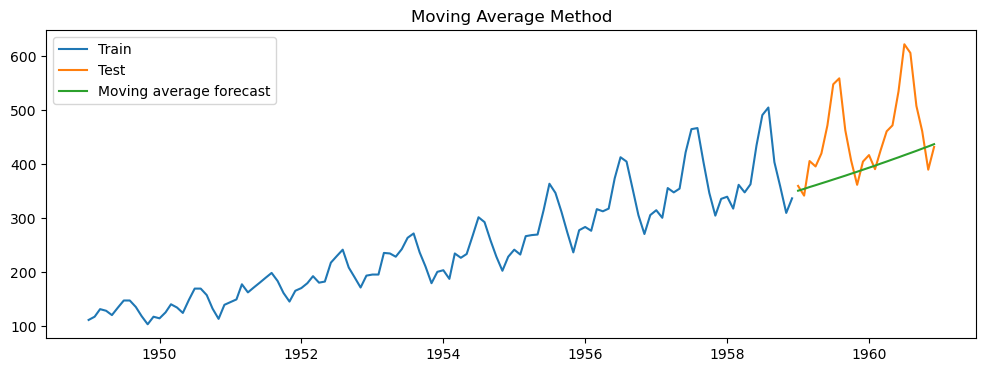

In [53]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(data['Passengers'][:train_len], label='Train')
plt.plot(data['Passengers'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [54]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78
0,Moving Average (MA) method,91.35,13.41


## ARMA (Auto Regressive Moving Average)

A time series that exhibits the characteristics of an **AR(p) and/or an MA(q)** process can be modelled using an ARMA(p,q) model.


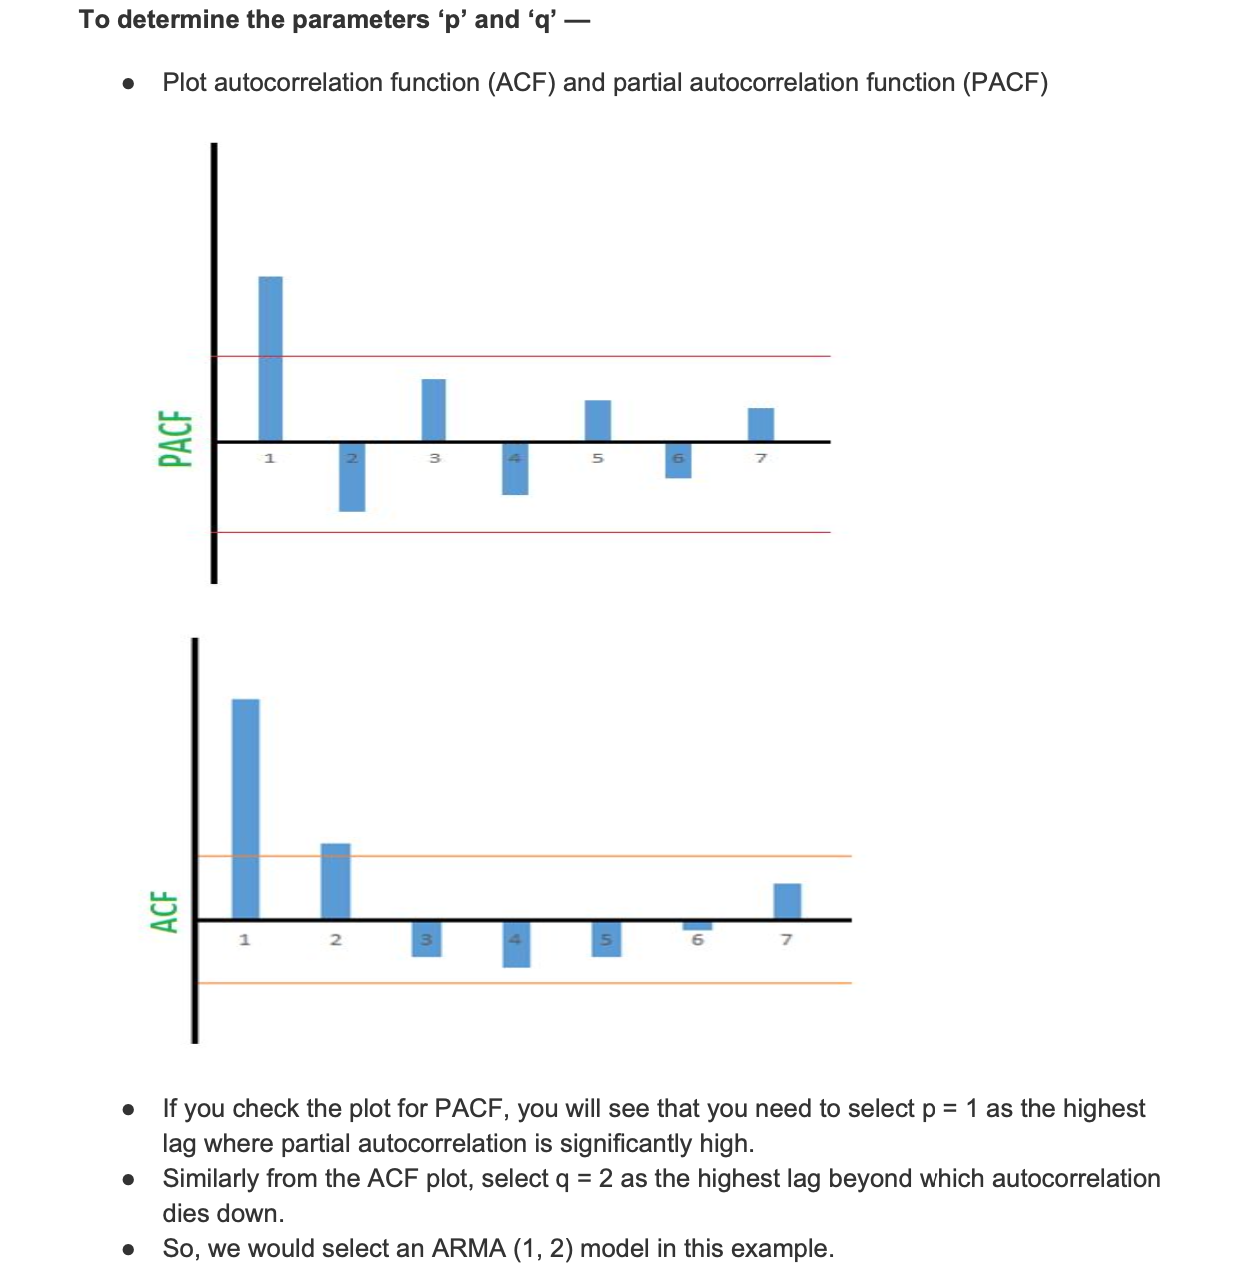


In [55]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.009618
ar.L1    -0.527079
ma.L1     0.798271
sigma2    0.010051
dtype: float64


In [56]:
# Recover Original Time Series 
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

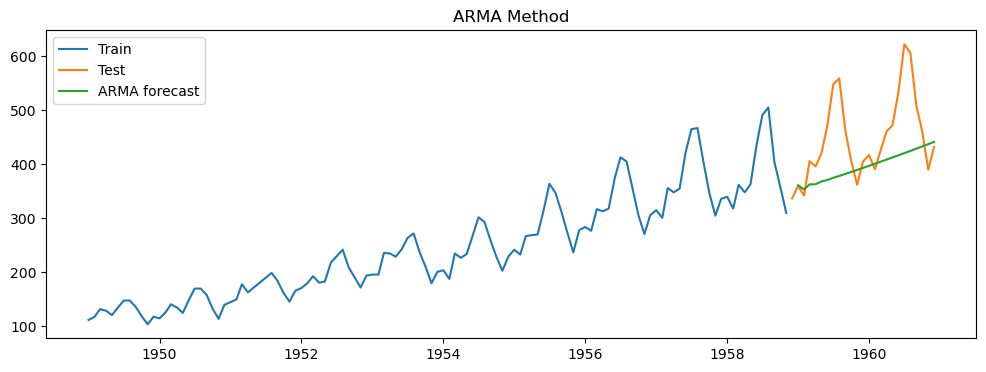

In [57]:
plt.figure(figsize=(12,4))
plt.plot( data['Passengers'][:train_len-1], label='Train')
plt.plot(data['Passengers'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [58]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78
0,Moving Average (MA) method,91.35,13.41
0,Autoregressive moving average (ARMA) method,89.06,12.91


## Auto regressive integrated moving average (ARIMA)

● Original time series is differenced to make it stationary

● Differenced series is modeled as a linear regression of

    ○ One or more past observations
    ○ Past forecast errors
    
● ARIMA model has three parameters

    ○ p:Highest lag included in the regression model
    
    ○ d:Degree of differencing to make the series stationary
    
    ○ q:Number of past error terms included in the regression model
    
Here the new parameter introduced is the ‘I’ part called integrated. It removes the trend (non-stationarity) and later integrates the trend to the original series.

For ‘d’: Select d as the order of difference required to make the original time series stationary. We can verify if this differenced series is stationary or not by using the stationarity tests: ADF or KPSS test.

In [59]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.522115
ma.L1     0.796168
sigma2    0.010117
dtype: float64


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
# Recover Original time series 
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

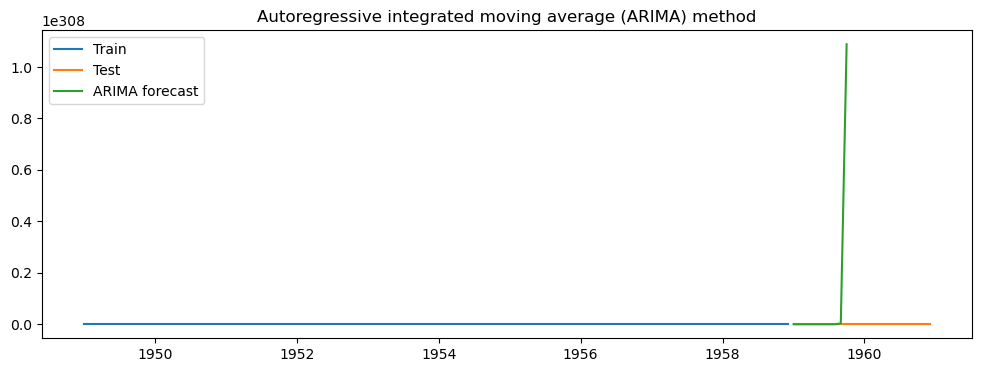

In [61]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [62]:
def calculate_rmse(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = np.square(errors)
    mean_squared_error = np.mean(squared_errors)
    rmse = np.sqrt(mean_squared_error)
    return rmse

def calculate_mape(y_true, y_pred):
    absolute_errors = np.abs(y_true - y_pred)
    absolute_percentage_errors = np.divide(absolute_errors, y_true, out=np.zeros_like(absolute_errors), where=y_true!=0)
    mape = np.mean(absolute_percentage_errors) * 100
    return mape

# Calculate RMSE
rmse = calculate_rmse(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():]).round(2)

# Calculate MAPE
mape = calculate_mape(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():]).round(2)

# Update DataFrame with results
tempResults = pd.DataFrame({'Method': ['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]


In [63]:
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78
0,Moving Average (MA) method,91.35,13.41
0,Autoregressive moving average (ARMA) method,89.06,12.91


In [64]:
#rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
#mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

#tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
#results = pd.concat([results, tempResults])
#results = results[['Method', 'RMSE', 'MAPE']]
#results

## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

SARIMA brings all the features of an ARIMA model with an extra feature - **seasonality**.

The non-seasonal elements of SARIMA

● Time series is differenced to make it stationary.

● Models future observation as linear regression of past observations and past forecast errors.

The seasonal elements of SARIMA

● Perform seasonal differencing on time series.

● Model future seasonality as linear regression of past observations of seasonality and past forecast errors of seasonality.


The parameters ‘p’, ‘d’, ‘q’ and ‘P’, ‘D’, ‘Q’:

● **Non-seasonal elements**

    ○ p:​ Trend autoregression order
    
    ○ d:​ Trend difference order
    
    ○ q:​ Trend moving average order
    
● **Seasonal elements**

    ○ m:​ The number of time steps for a single seasonal period
    
    ○ P:​ Seasonal autoregressive order
    
    ○ D:​ Seasonal difference order
    
    ○ Q:​ Seasonal moving average order

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60524D+00    |proj g|=  4.30828D+00


/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f= -1.61816D+00    |proj g|=  8.28768D-01

At iterate   10    f= -1.63329D+00    |proj g|=  2.50726D-01

At iterate   15    f= -1.63546D+00    |proj g|=  5.15662D-01

At iterate   20    f= -1.64047D+00    |proj g|=  1.36514D+00

At iterate   25    f= -1.64302D+00    |proj g|=  4.18669D-03

At iterate   30    f= -1.64305D+00    |proj g|=  6.52355D-02

At iterate   35    f= -1.64348D+00    |proj g|=  1.26016D-01

At iterate   40    f= -1.64354D+00    |proj g|=  5.15200D-03

At iterate   45    f= -1.64354D+00    |proj g|=  1.38957D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     82   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


### Recover original time series forecast

In [66]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

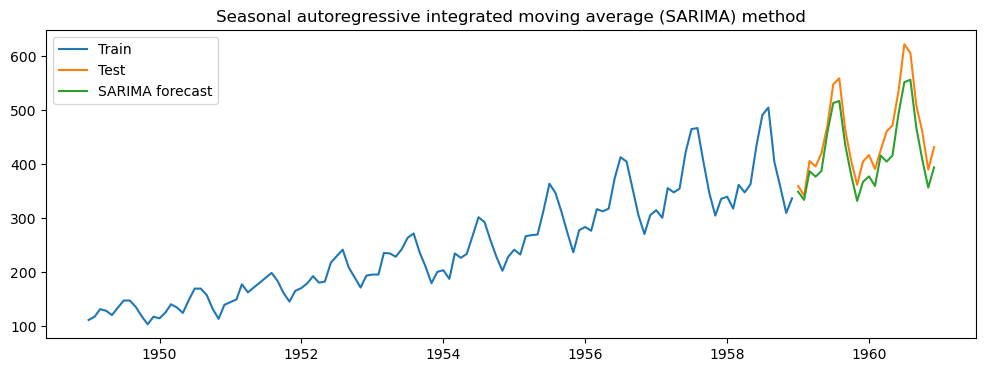

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [68]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78
0,Moving Average (MA) method,91.35,13.41
0,Autoregressive moving average (ARMA) method,89.06,12.91


### Seasonal auto regressive integrate moving average with exogenous variable (SARIMAX)

**SARIMAX has three components**:

● Non-seasonal elements
    
      ○ Models future observation as a linear regression of past observations and past forecast errors.
        
      ○ Performs differencing to make time-series stationary.
    
● Seasonal elements

      ○ Models seasonality as the linear regression of past observations and past forecast errors from previous seasons.
      ○ Perform seasonal differencing to make time-series stationary over seasons.
  
● Exogenous variable

      ○ Models future observations as linear regression of an external variable.      
The parameters ‘p’, ‘d’, ‘q’ and ‘P’, ‘D’, ‘Q’ will be the same as SARIMA(p,d,q)(P,D,Q)m.

● Determining parameter values
    ○ PACF plots to determine non-seasonal ‘p’ value
    
    ○ ACF plots to identify non-seasonal ‘q’ value
    
● Use stationarity tests to determine the value 'd'

● Use grid search to choose optimal seasonal P, D and Q parameter values

### Split promotion data into train and test data sets

In [69]:
# Promotion
promo = pd.read_csv('/Users/jasdeepmonga/Downloads/promotion (1).csv', header = None)
promo.columns = ['Month','Event']
promo['Month'] = pd.to_datetime(promo['Month'], format='%Y-%m')
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


### Build SARIMAX model

In [70]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [71]:
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=promo_train) 
model_fit = model.fit()
print(model_fit.params)

/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jasdeepmonga/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61352D+00    |proj g|=  4.68059D+00

At iterate    5    f= -1.62897D+00    |proj g|=  7.25975D-01

At iterate   10    f= -1.63433D+00    |proj g|=  1.69441D+00

At iterate   15    f= -1.64641D+00    |proj g|=  4.47365D-02

At iterate   20    f= -1.64695D+00    |proj g|=  9.58010D-01

At iterate   25    f= -1.65989D+00    |proj g|=  1.50846D+00

At iterate   30    f= -1.66162D+00    |proj g|=  8.49755D-02

At iterate   35    f= -1.66256D+00    |proj g|=  1.04001D-02

At iterate   40    f= -1.66256D+00    |proj g|=  1.00792D-03

At iterate   45    f= -1.66256D+00    |proj g|=  1.05838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


### Recover original time series forecast

In [72]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

### Plot train, test and forecast

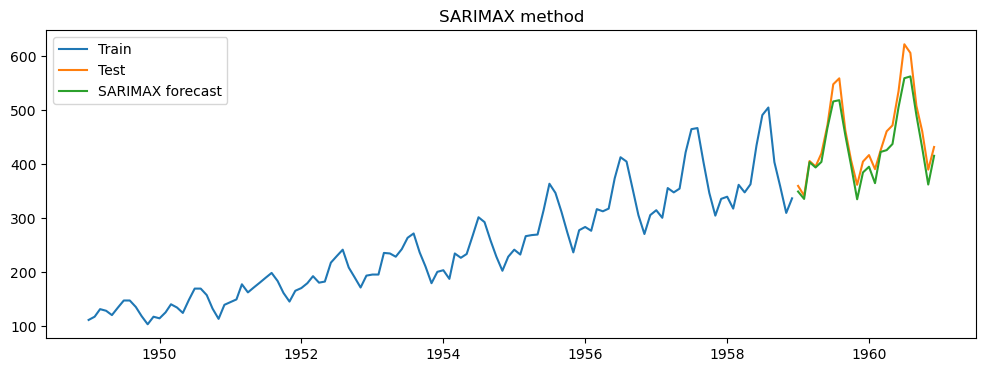

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

### Calculate RMSE and MAPE

In [74]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,80.91,11.39
0,Holt Winters' additive method,35.87,6.72
0,Holt Winters' multiplicative method,32.45,6.45
0,Autoregressive (AR) method,93.49,13.78
0,Moving Average (MA) method,91.35,13.41
0,Autoregressive moving average (ARMA) method,89.06,12.91


In this project, I explored various time series forecasting models with the objective of predicting future values of our dataset. We implemented and evaluated several baseline models.

**Through rigorous evaluation using metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE), we compared the performance of these models across our dataset.** 

Our analysis revealed interesting insights into their respective strengths and weaknesses.